In [7]:
!pip install selenium
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
import urllib
import time
import os
from PIL import Image
import io



The system cannot find the path specified.


In [10]:
searches = ['flowcharts', 'annotated diagrams', 'physics diagrams']

C:\Users\Admin\AppData\Local\Temp\ipykernel_12736\1258820090.py:6: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)


ERROR - COULD NOT DOWNLOAD  - No connection adapters were found for ''
ERROR - COULD NOT SAVE  - local variable 'image_content' referenced before assignment
ERROR - COULD NOT DOWNLOAD  - No connection adapters were found for ''
ERROR - COULD NOT SAVE  - local variable 'image_content' referenced before assignment
ERROR - COULD NOT DOWNLOAD  - No connection adapters were found for ''
ERROR - COULD NOT SAVE  - local variable 'image_content' referenced before assignment
ERROR - COULD NOT DOWNLOAD  - No connection adapters were found for ''
ERROR - COULD NOT SAVE  - local variable 'image_content' referenced before assignment
ERROR - COULD NOT DOWNLOAD  - No connection adapters were found for ''
ERROR - COULD NOT SAVE  - local variable 'image_content' referenced before assignment
ERROR - COULD NOT DOWNLOAD  - No connection adapters were found for ''
ERROR - COULD NOT SAVE  - local variable 'image_content' referenced before assignment
ERROR - COULD NOT DOWNLOAD  - No connection adapters were 
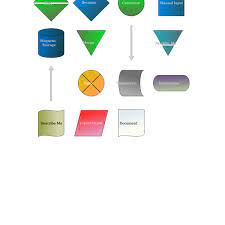
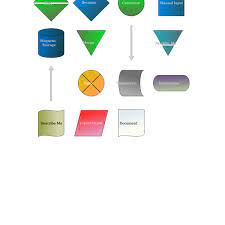
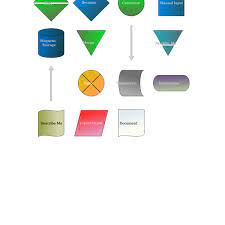
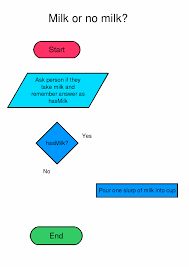
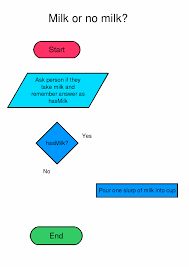
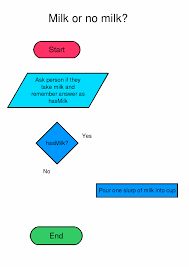
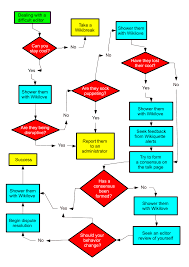
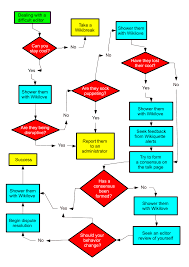
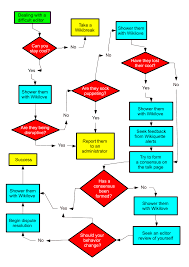
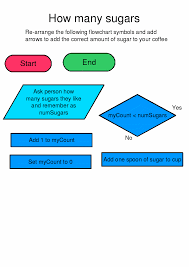
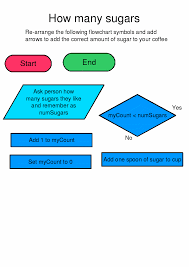
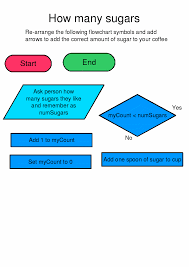
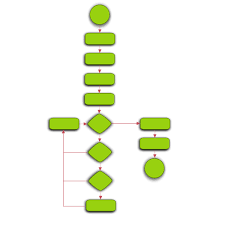
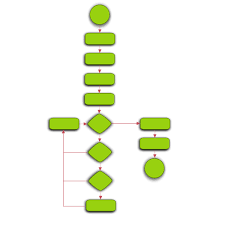
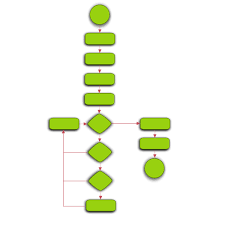
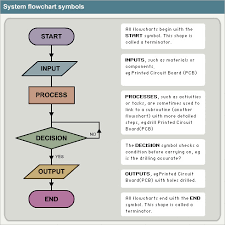
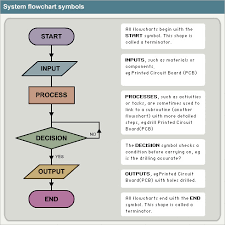
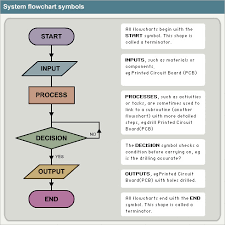
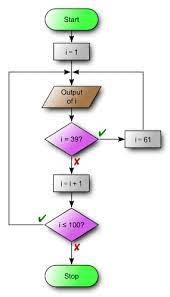
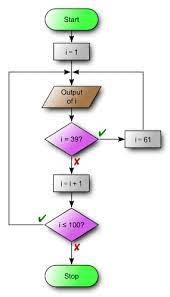
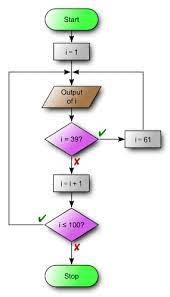
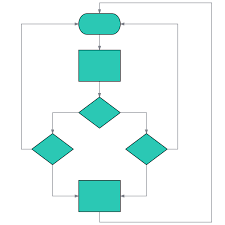
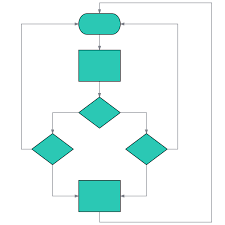
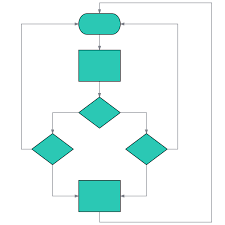
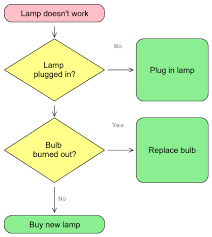
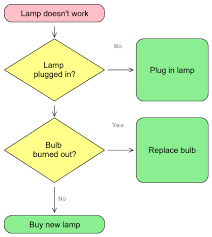
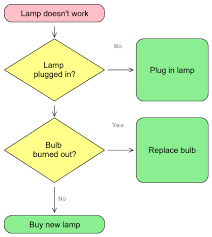
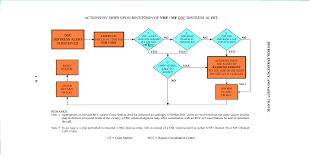
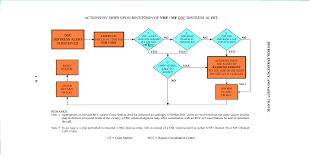
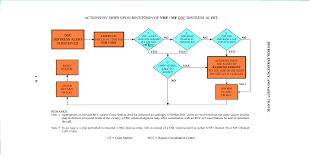
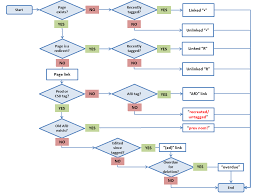
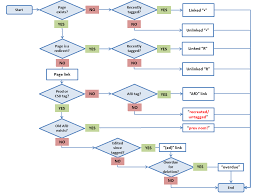
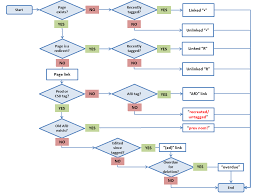
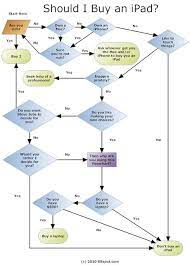
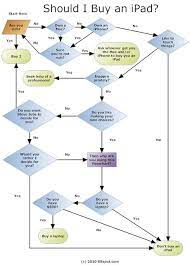
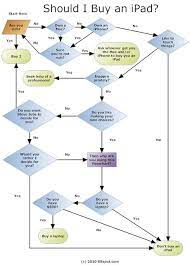
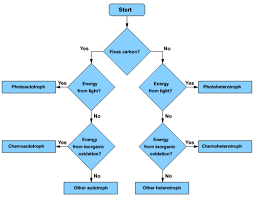
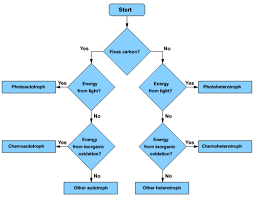
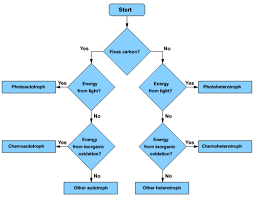
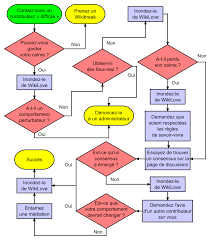
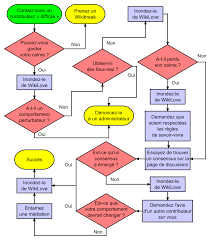
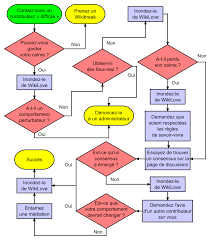
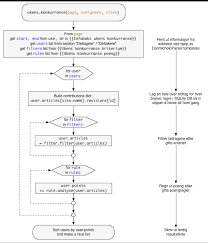
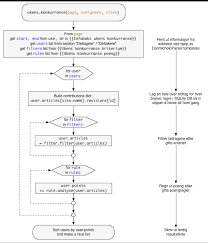
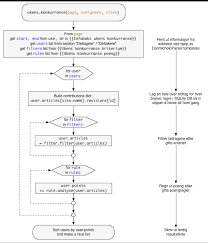
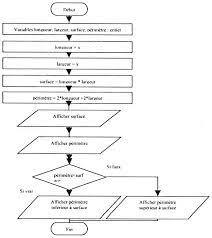
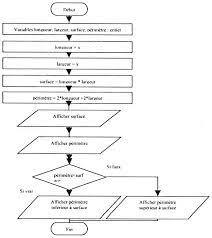
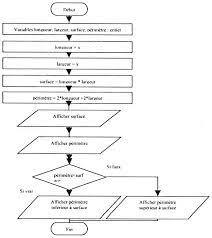
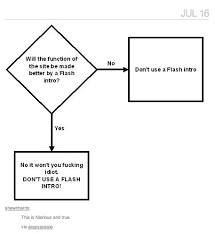
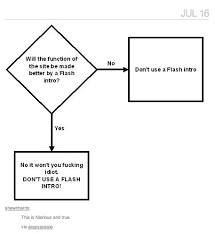
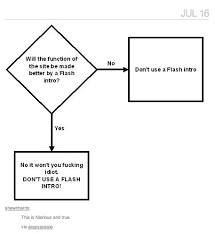
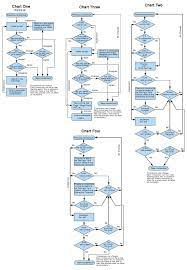
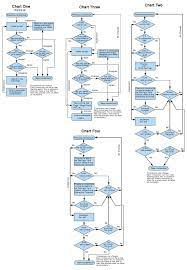
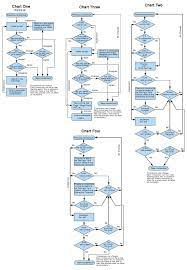
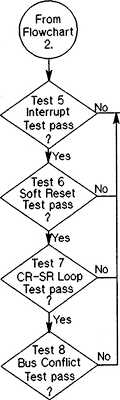
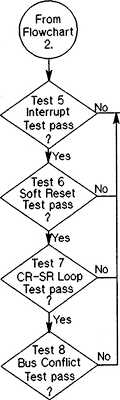
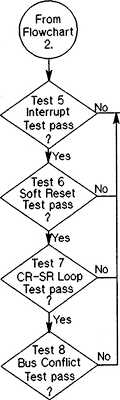
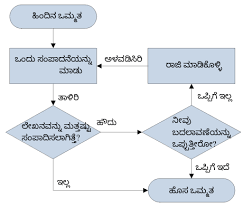
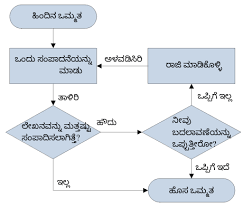
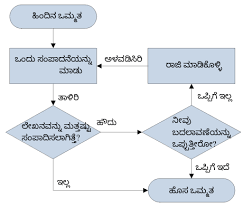
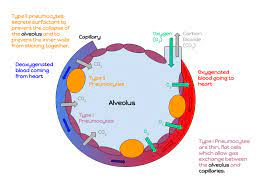
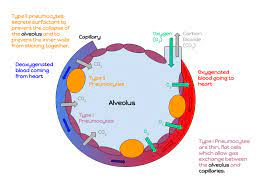
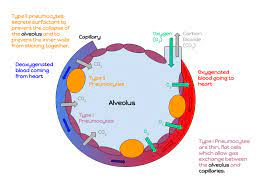
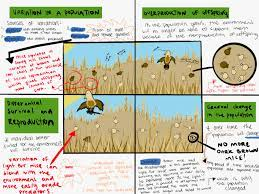
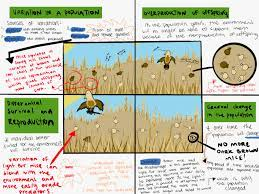
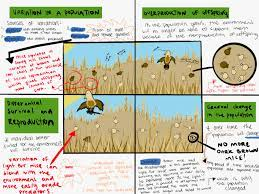
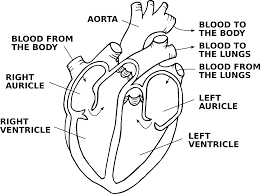
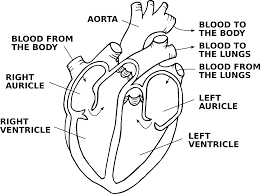
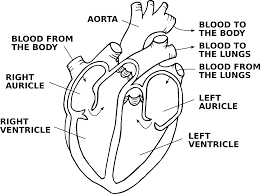
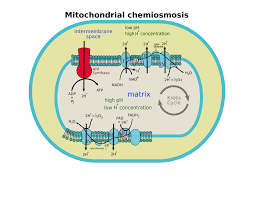
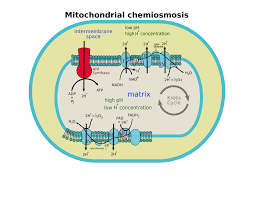
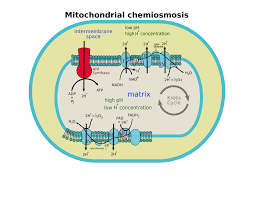
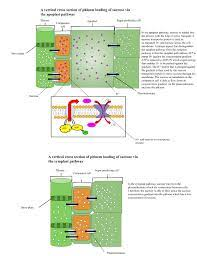
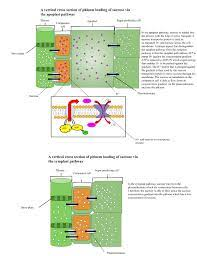
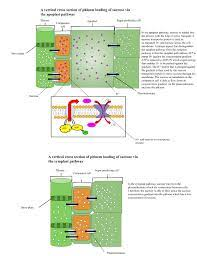
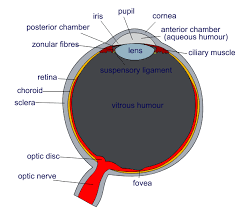
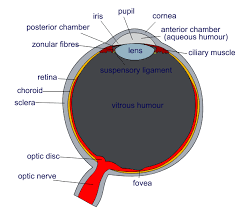
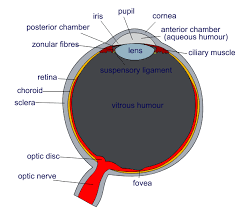
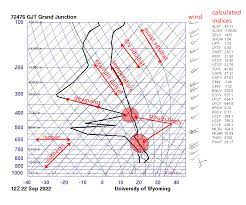
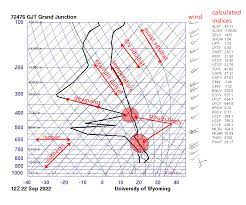
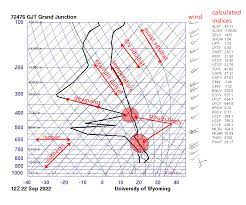
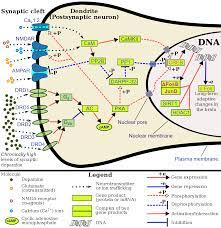
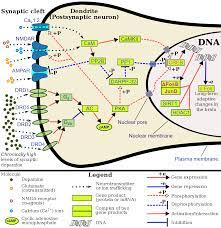
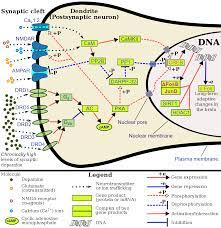
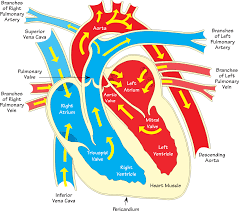
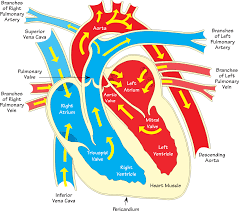
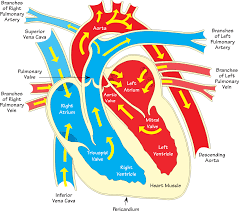
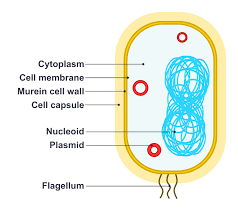
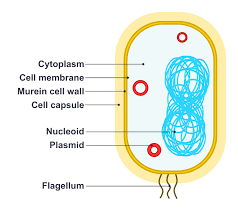
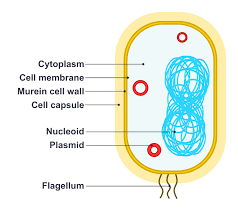
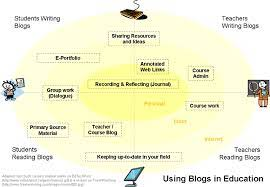
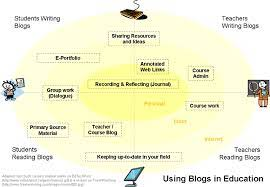
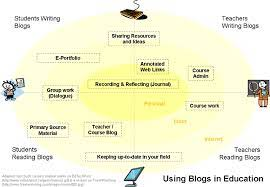
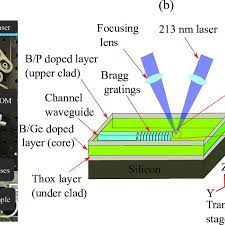
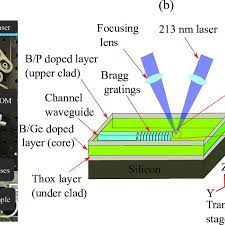
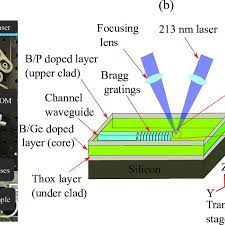
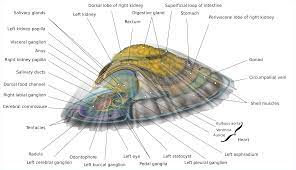
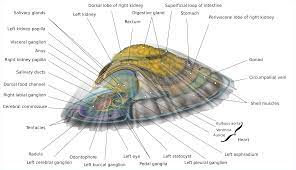
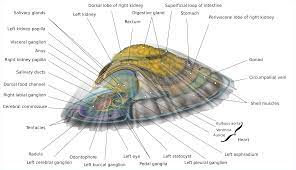
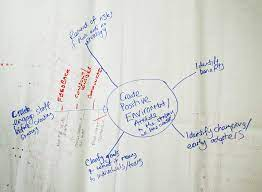
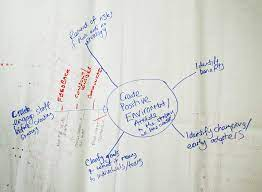
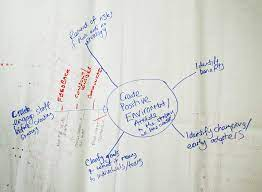
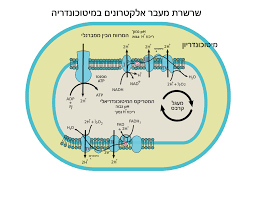
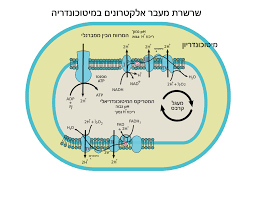
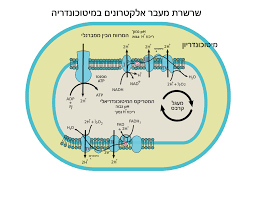
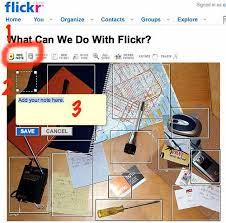
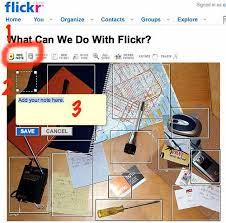
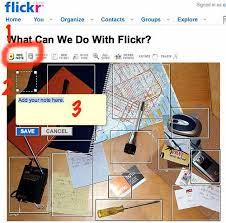
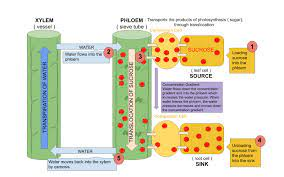
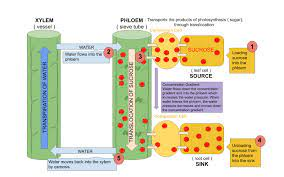
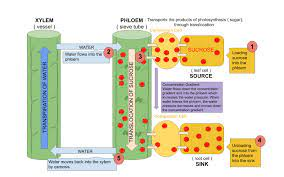
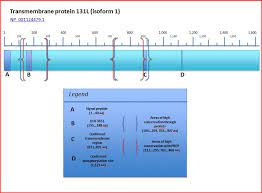
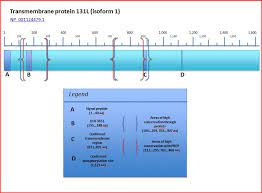
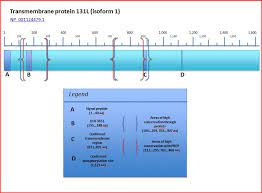
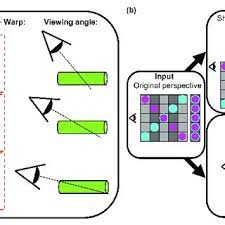
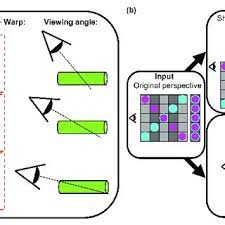
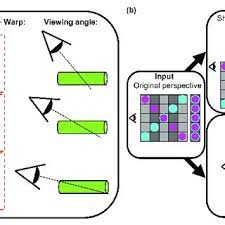
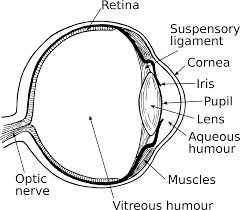
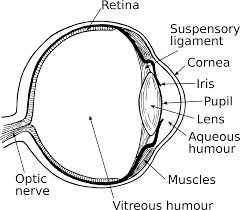
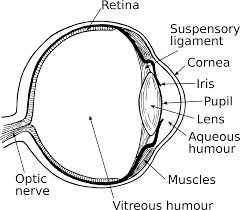
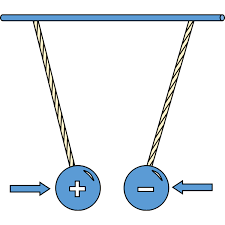
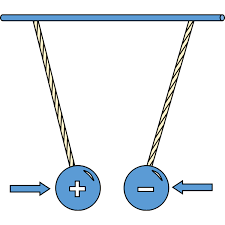
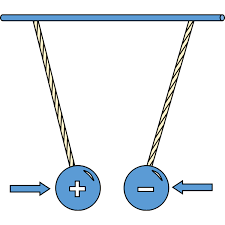
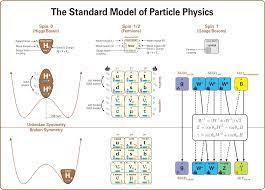
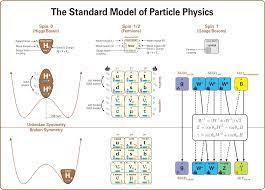
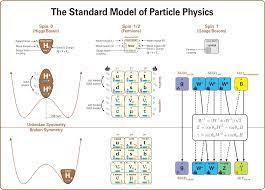
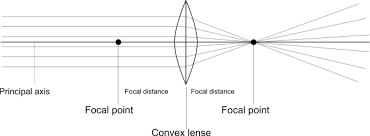
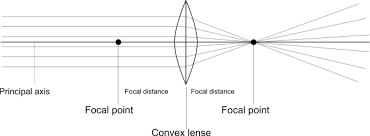
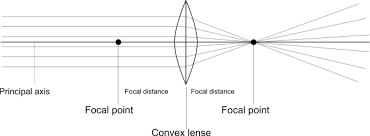
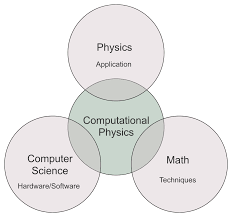
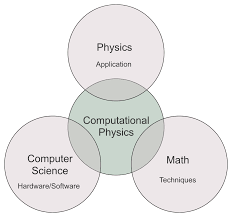
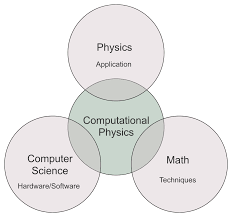
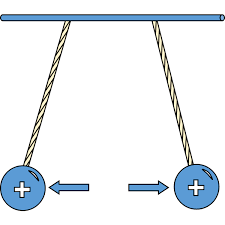
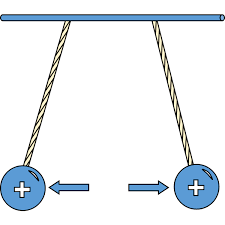
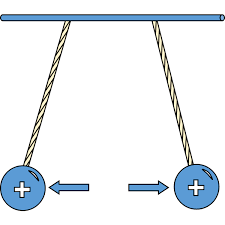
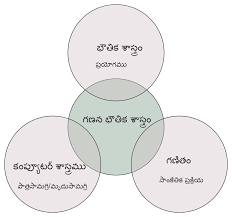
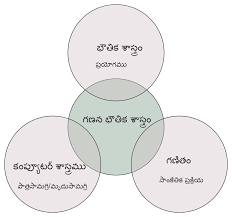
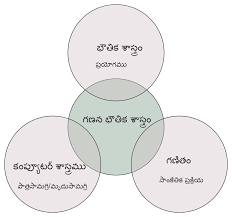
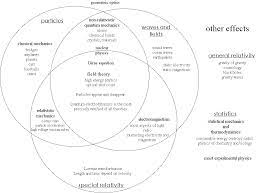
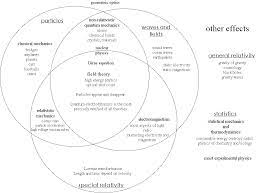
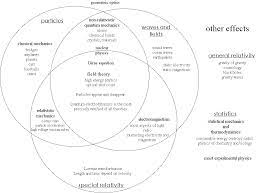
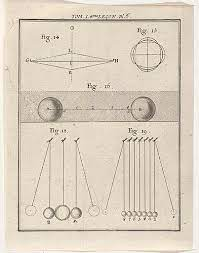
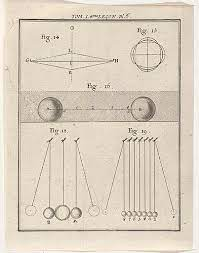
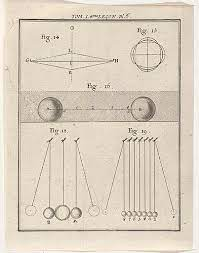
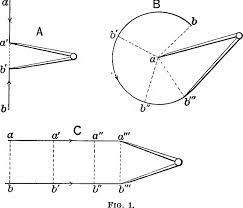
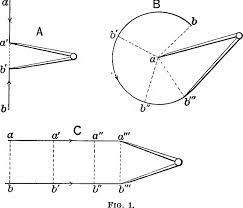
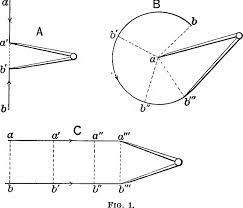
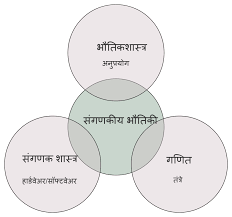
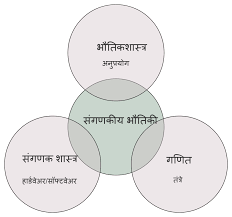
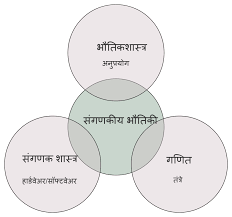
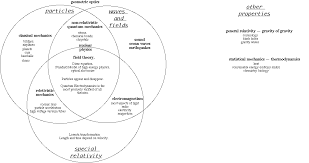
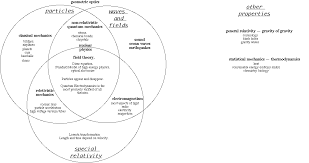
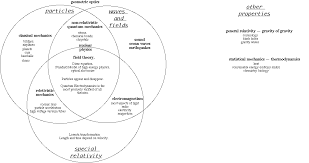
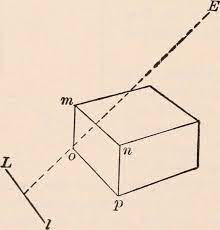
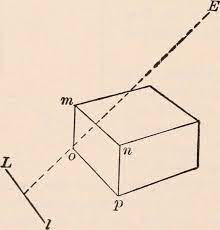
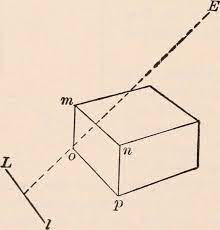
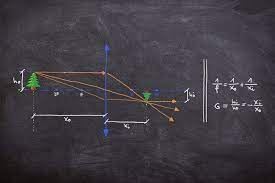
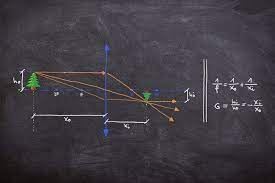
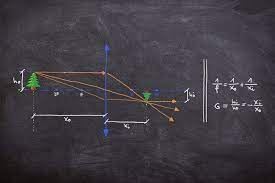
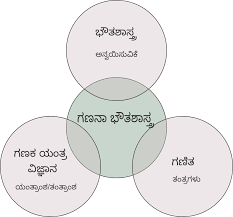
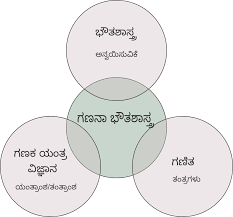
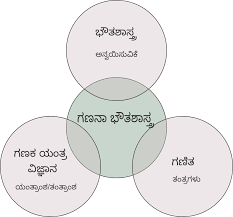
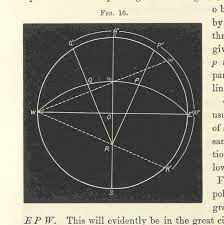
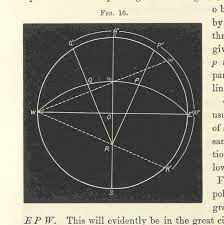
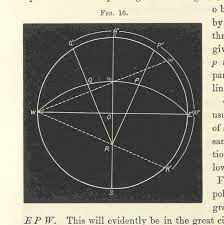
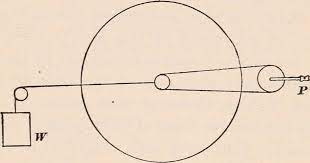
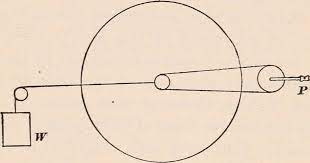
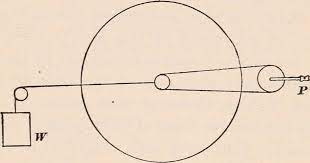
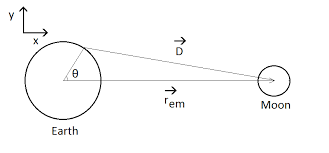
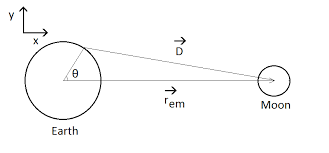
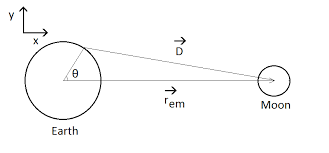
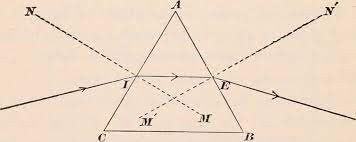
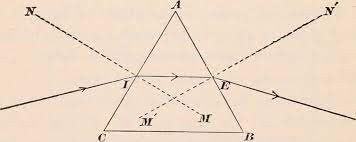
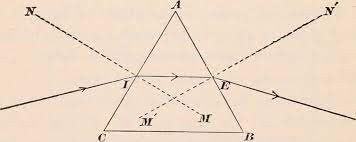
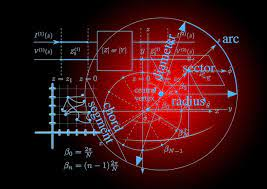
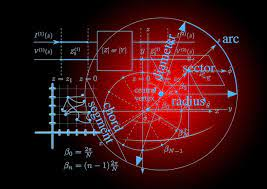
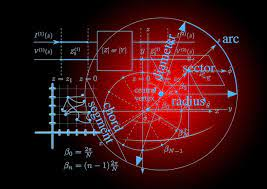

In [11]:
for search in searches:
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
    # Create url variable containing the webpage for a Google image search.
    url = ("https://www.google.com/search?q={s}&tbm=isch&hl=en&tbs=il:cl&rlz=1C1CHBD_enSG948SG948&sa=X&ved=0CAAQ1vwEahcKEwiIsK6cjJX-AhUAAAAAHQAAAAAQAw&biw=875&bih=719")
    # Launch the browser and open the given url in the webdriver.
    driver.get(url.format(s=search))
    # Scroll down the body of the web page and load the images.
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
    time.sleep(5)
    # Find the images.
    imgResults = driver.find_elements(By.XPATH,"//img[contains(@class,'rg_i Q4LuWd')]")
    # Access and store the scr list of image url's.
    src = []
    for img in imgResults:
        src.append(img.get_attribute('src'))
    # Retrieve and download the images.

    if not os.path.exists('scraped'):
        os.makedirs('scraped')


    def downloadImages(folder_path,file_name,url):
        try:
            image_content = requests.get(url).content

        except Exception as e:
            print(f"ERROR - COULD NOT DOWNLOAD {url} - {e}")

        try:
            image_file = io.BytesIO(image_content)
            image = Image.open(image_file).convert('RGB')
            
            file_path = os.path.join(folder_path, file_name)
            
            with open(file_path, 'wb') as f:
                image.save(f, "JPEG", quality=85)
            print(f"SAVED - {url} - AT: {file_path}")
        except Exception as e:
            print(f"ERROR - COULD NOT SAVE {url} - {e}")

    for i in range(len(src)):
        ts = time.time()
        downloadImages('./scraped/' ,  "anno{}.jpg".format(ts), str(src[i]))